# Load Data

In [1]:
import pandas as pd
import emoji
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords
import csv
import re
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

df=pd.read_csv(r'C:\Users\Mhaiskao\Desktop\Assignments\DMTA\olid-training-v1.0.tsv',sep='\t', encoding="utf-8",quotechar='\0')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"""@USER Someone should'veTaken"""" this piece of ...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


# Add Headings to ARFF File

In [3]:
f= open(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_updated_tweet.arff","a+")
f.write("@relation Test\n")
f.write("@attribute 'id' numeric\n")
f.write("@attribute 'tweet' string\n")
f.write("@attribute 'subtask_a' {NOT,OFF}\n")
f.write("@attribute 'subtask_b' {TIN,UNT,NULL}\n")
f.write("@attribute 'subtask_c' {IND,GRP,OTH,NULL}\n")
f.write("@data\n")
f.close()

In [4]:
df

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"""@USER Someone should'veTaken"""" this piece of ...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
5,97670,@USER Liberals are all Kookoo !!!,OFF,TIN,OTH
6,77444,@USER @USER Oh noes! Tough shit.,OFF,UNT,NaN
7,52415,@USER was literally just talking about this lo...,OFF,TIN,GRP
8,45157,@USER Buy more icecream!!!,NOT,NaN,NaN
9,13384,@USER Canada doesn’t need another CUCK! We alr...,OFF,TIN,IND


# Data Preparation

In [5]:
def preparation(df):
    df['subtask_c'].fillna("NULL",inplace = True)
    df['subtask_b'].fillna("NULL",inplace = True)

    #Convert to lower case
    df['tweet']=df['tweet'].str.lower()

    for i in range(0,len(df['tweet'])):

        #Removal of User Id
        df['tweet'][i] = re.sub("user", "", df['tweet'][i])

        #Removal of URL
        df['tweet'][i] = re.sub("url", "", df['tweet'][i])

        #Removal of Punctuations
        df['tweet'][i] = ' '.join(re.sub("[\.\,\!\?\:\;\-\=\"\’]", " ", df['tweet'][i]).split())

        #Converting emojis to corresponding words
        df['tweet'][i]=emoji.demojize(df['tweet'][i], delimiters=(""," "))


    #Remove words with length less the 3
    df['tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    df['tidy_tweet']=df['tweet']
    df.update("'" + df[['tweet']].astype(str) + "'")
    
    return df

df=preparation(df)

# df.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\training_updated_tweet.arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\

# Plot Graph for Targets

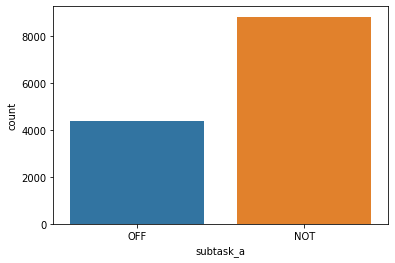

In [6]:
def graph_subtask(subtask):
    df[subtask].value_counts(normalize=True)*100
    sns.countplot(x=subtask, data=df)

graph_subtask('subtask_a')


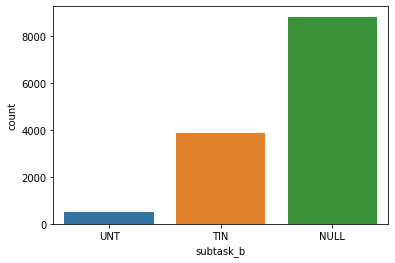

In [7]:
graph_subtask('subtask_b')

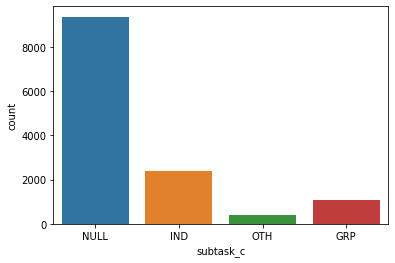

In [8]:
graph_subtask('subtask_c')

In [9]:
df

,id,tweet,subtask_a,subtask_b,subtask_c,tidy_tweet
0,86426,'should native americans what their take this',OFF,UNT,NULL,should native americans what their take this
1,90194,'home drunk #maga #trump2020 oncoming_fist Uni...,OFF,TIN,IND,home drunk #maga #trump2020 oncoming_fist Unit...
2,16820,'amazon investigating chinese employees sellin...,NOT,NULL,NULL,amazon investigating chinese employees selling...
3,62688,'someone should'vetaken this piece shit volcan...,OFF,UNT,NULL,someone should'vetaken this piece shit volcano...
4,43605,'obama wanted liberals &amp illegals move into...,NOT,NULL,NULL,obama wanted liberals &amp illegals move into ...
5,97670,'liberals kookoo',OFF,TIN,OTH,liberals kookoo
6,77444,'noes tough shit',OFF,UNT,NULL,noes tough shit
7,52415,'literally just talking about this mass shooti...,OFF,TIN,GRP,literally just talking about this mass shootin...
8,45157,'more icecream',NOT,NULL,NULL,more icecream
9,13384,'canada doesn need another cuck already have e...,OFF,TIN,IND,canada doesn need another cuck already have en...


# Remove Stop Words

In [10]:
def remove_stopwords(df):
    nltk.download('stopwords')

    df_without_stopwords = pd.DataFrame(columns=['tidy_tweet','subtask_a','subtask_b','subtask_c'])
    without_wordlist=[]
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        without_wordlist.append(' '.join(resultwords))

    df_without_stopwords['tidy_tweet'] = without_wordlist
    df_without_stopwords['subtask_a']=df['subtask_a']
    df_without_stopwords['subtask_b']=df['subtask_b']
    df_without_stopwords['subtask_c']=df['subtask_c']
    return df_without_stopwords


In [11]:
df_without_stopwords=remove_stopwords(df)
df['tidy_tweet']=df_without_stopwords['tidy_tweet']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Stemming and Lemmatization

In [32]:
def Tokenize(df_stemming,df_without_stopwords):
    df_stemming['tokenized']=df_without_stopwords['tidy_tweet'].apply(lambda x: x.split())
    
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def WordTokenize(df_stemming,df_without_stopwords):
    df_stemming['word_tokenize']=df_without_stopwords['tidy_tweet'].apply(lambda x: stemSentence(x))
     
def SnowballStemmer1(df_stemming,df_without_stopwords):
    englishStemmer=SnowballStemmer("english")
    df_stemming['SnowballStemmer123']=df_without_stopwords['tidy_tweet'].apply(lambda x: englishStemmer.stem(x))
    
def Porter(df_stemming,df_without_stopwords):
    porter = PorterStemmer()
    df_stemming['Porter']=df_without_stopwords['tidy_tweet'].apply(lambda x: porter.stem(x))

def Lancaster(df_stemming,df_without_stopwords):
    lancaster=LancasterStemmer()
    df_stemming['Lancaster']=df_without_stopwords['tidy_tweet'].apply(lambda x: lancaster.stem(x))
    
def Lemmatizer(df_stemming,df_without_stopwords):
    lemmatizer = WordNetLemmatizer() 
    df_stemming['Lemmatized']=df_without_stopwords['tidy_tweet'].apply(lambda x: lemmatizer.lemmatize(x))

def StemmingAndLemma(df_stemming,df_without_stopwords):
    #Word Tokenize using word_tokenize    
    WordTokenize(df_stemming,df_without_stopwords)

    #SnowballStemmer
    SnowballStemmer1(df_stemming,df_without_stopwords)

    #Tokenizer
    Tokenize(df_stemming,df_without_stopwords)

    #Porter Stemmer
    Porter(df_stemming,df_without_stopwords)

    #Lancaster Stemmer
    Lancaster(df_stemming,df_without_stopwords)

    #Lemmatizer 
    Lemmatizer(df_stemming,df_without_stopwords)

    return df_stemming

df_stemming=pd.DataFrame()
df_stemming['tidy_tweet']=df_without_stopwords['tidy_tweet']

df_stemming=StemmingAndLemma(df_stemming,df_without_stopwords)
df_stemming

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,"[home, drunk, #maga, #trump2020, oncoming_fist...",home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
2,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employees selling...,"[amazon, investigating, chinese, employees, se...",amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...
3,someone should'vetaken piece shit volcano face...,someon should'vetaken piec shit volcano face_w...,someone should'vetaken piece shit volcano face...,"[someone, should'vetaken, piece, shit, volcano...",someone should'vetaken piece shit volcano face...,someone should'vetaken piece shit volcano face...,someone should'vetaken piece shit volcano face...
4,obama wanted liberals &amp illegals move states,obama want liber & amp illeg move state,obama wanted liberals &amp illegals move st,"[obama, wanted, liberals, &amp, illegals, move...",obama wanted liberals &amp illegals move st,obama wanted liberals &amp illegals move states,obama wanted liberals &amp illegals move states
5,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
6,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
7,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
8,icecream,icecream,icecream,[icecream],icecream,icecream,icecream
9,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...


# Remove words having frequency less than 3 from each Stemmed and Lematized Tweet

In [62]:
from collections import defaultdict  # available in Python 2.5 and newer

def get_frequency_of_words(df_stemming,column_name):
    print('ddfddddf',column_name)
    Tweet_list=df_stemming[column_name]
    Dictionary_Tweet= defaultdict(int)
    Tweet_word_list=[]
    def update(i):
        Dictionary_Tweet[i] += 1
    [[ update(i) for i in tweet.split()] for tweet in Tweet_list]

    for key,value in Dictionary_Tweet.items():
        if value>3:
            Tweet_word_list.append(key)
    return Tweet_word_list

def remove_words_from_tweet(df_stemming,columnname,word_list):
    for i in range(len(df_stemming[columnname])):
        resultwords = [word for word in df_stemming[columnname][i].split() if word in word_list]
        if len(resultwords)!=0:
            df_stemming[columnname][i] = ' '.join(resultwords)
    return df_stemming

In [64]:

def frequency(df_stemming):
    #Get words with minimun 3 frequency for all stemming types
    tidy_tweet_list=get_frequency_of_words(df_stemming,'tidy_tweet')
    df_stemming=remove_words_from_tweet(df_stemming,'tidy_tweet',tidy_tweet_list)

    word_tokenize_list=get_frequency_of_words(df_stemming,'word_tokenize')
    df_stemming=remove_words_from_tweet(df_stemming,'word_tokenize',word_tokenize_list)

    SnowballStemmer123_list=get_frequency_of_words(df_stemming,'SnowballStemmer123')
    df_stemming=remove_words_from_tweet(df_stemming,'SnowballStemmer123',SnowballStemmer123_list)

    Porter_list=get_frequency_of_words(df_stemming,'Porter')
    df_stemming=remove_words_from_tweet(df_stemming,'Porter',Porter_list)

    Lancaster_list=get_frequency_of_words(df_stemming,'Lancaster')
    df_stemming=remove_words_from_tweet(df_stemming,'Lancaster',Lancaster_list)

    Lemmatized_list=get_frequency_of_words(df_stemming,'Lemmatized')
    df_stemming=remove_words_from_tweet(df_stemming,'Lemmatized',Lemmatized_list)
    
    return df_stemming
df_stemming=frequency(df_stemming)

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


# Final Upated Tweet's For Subtask A

In [34]:
df['tidy_tweet_updated']=df_stemming['tidy_tweet']
df['word_tokenize']=df_stemming['word_tokenize']
df['SnowballStemmer123']=df_stemming['SnowballStemmer123']
df['Porter']=df_stemming['Porter']
df['Lancaster']=df_stemming['Lancaster']
df['Lemmatized']=df_stemming['Lemmatized']
df

,id,tweet,subtask_a,subtask_b,subtask_c,tidy_tweet,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,86426,'should native americans what their take this',OFF,UNT,NULL,native americans,native americans,nativ american,native american,native american,native americans,native americans
1,90194,'home drunk #maga #trump2020 oncoming_fist Uni...,OFF,TIN,IND,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
2,16820,'amazon investigating chinese employees sellin...,NOT,NULL,NULL,amazon investigating chinese employees selling...,amazon chinese employees selling data third pa...,amazon investig chines employe sell intern dat...,amazon chinese employees selling data third pa...,amazon chinese employees selling data third pa...,amazon chinese employees selling data third pa...,amazon chinese employees selling data third pa...
3,62688,'someone should'vetaken this piece shit volcan...,OFF,UNT,NULL,someone should'vetaken piece shit volcano face...,someone piece shit face_with_tears_of_joy,someon piec shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy
4,43605,'obama wanted liberals &amp illegals move into...,NOT,NULL,NULL,obama wanted liberals &amp illegals move states,obama wanted liberals &amp illegals move states,obama want liber & amp illeg move state,obama wanted liberals &amp illegals move st,obama wanted liberals &amp illegals move st,obama wanted liberals &amp illegals move states,obama wanted liberals &amp illegals move states
5,97670,'liberals kookoo',OFF,TIN,OTH,liberals kookoo,liberals,liber,liberals,liberals,liberals,liberals
6,77444,'noes tough shit',OFF,UNT,NULL,noes tough shit,tough shit,tough shit,tough shit,tough shit,tough shit,tough shit
7,52415,'literally just talking about this mass shooti...,OFF,TIN,GRP,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
8,45157,'more icecream',NOT,NULL,NULL,icecream,icecream,icecream,icecream,icecream,icecream,icecream
9,13384,'canada doesn need another cuck already have e...,OFF,TIN,IND,canada need another cuck already enough #loone...,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...


In [25]:
from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]

def generate_ngram(df):
    ngram_list=[]
    ngram_subtask_a=[]
    ngram_subtask_b=[]
    ngram_subtask_c=[]

    for i in range(len(df)):
        querywords = df['tidy_tweet'][i].split()
        resultwords  = [word for word in extract_ngrams(df['tidy_tweet'][i], 2)]

        for words in resultwords:
            ngram_list.append(words)
            ngram_subtask_a.append(df['subtask_a'][i])
            ngram_subtask_b.append(df['subtask_b'][i])
            ngram_subtask_c.append(df['subtask_c'][i])

    df_ngram=pd.DataFrame()
    df_ngram['ngram']=ngram_list
    df_ngram['subtask_a']=ngram_subtask_a
    df_ngram['subtask_b']=ngram_subtask_b
    df_ngram['subtask_c']=ngram_subtask_c

    return df_ngram

df_ngram=generate_ngram(df)

df_ngram
# df.update("'" + df[['tweet']].astype(str) + "'")


,ngram,subtask_a,subtask_b,subtask_c
0,native americans,OFF,UNT,NULL
1,home drunk,OFF,TIN,IND
2,drunk maga,OFF,TIN,IND
3,maga trump2020,OFF,TIN,IND
4,trump2020 oncoming_fist,OFF,TIN,IND
5,oncoming_fist United_States,OFF,TIN,IND
6,United_States oncoming_fist,OFF,TIN,IND
7,amazon investigating,NOT,NULL,NULL
8,investigating chinese,NOT,NULL,NULL
9,chinese employees,NOT,NULL,NULL


# Generate Word Cloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


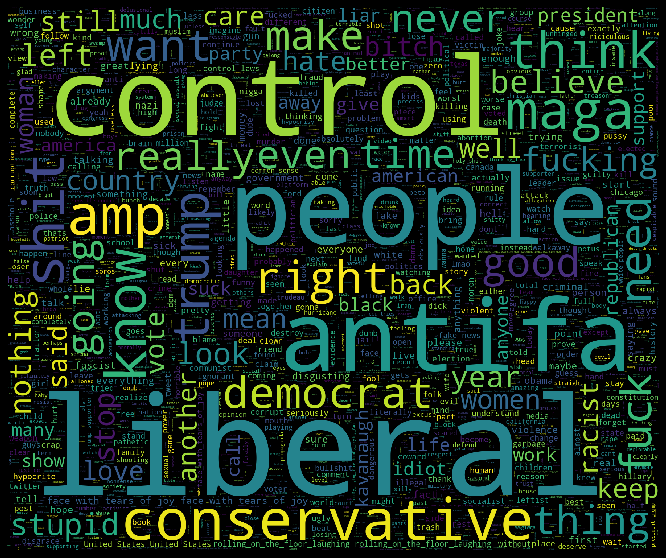

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def Plot_Wordcloud(df,columnname,subtask,target):
    nltk.download('stopwords')
    #NLTK stop words list
    stop_words_list = stopwords.words('english')

    #Combine wordcloud and NLTK stop words
    stop_words = ["will","take","should've"] + list(STOPWORDS)+stop_words_list

    all_words=' '.join([text for text in df[columnname][df[subtask]==target]])

    wordcloud=WordCloud(stopwords = stop_words,width=1800,height=1500,max_words=100000).generate(all_words)


    plt.figure(figsize=(20,10),facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
Plot_Wordcloud(df,'tidy_tweet','subtask_a','OFF')

# Retrieve Tweets for Subtask B 

In [54]:
df_subtask_b=pd.DataFrame()
df_subtask_b = df.ix[(df['subtask_a'] == 'OFF'),['tweet','tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_b = df_subtask_b.reset_index()
del df_subtask_b['index']
df_subtask_b

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tweet,tidy_tweet,subtask_a,subtask_b,subtask_c
0,'should native americans what their take this',native americans,OFF,UNT,NULL
1,'home drunk #maga #trump2020 oncoming_fist Uni...,home drunk #maga #trump2020 oncoming_fist Unit...,OFF,TIN,IND
2,'someone should'vetaken this piece shit volcan...,someone should'vetaken piece shit volcano face...,OFF,UNT,NULL
3,'liberals kookoo',liberals kookoo,OFF,TIN,OTH
4,'noes tough shit',noes tough shit,OFF,UNT,NULL
5,'literally just talking about this mass shooti...,literally talking mass shootings propaganda us...,OFF,TIN,GRP
6,'canada doesn need another cuck already have e...,canada need another cuck already enough #loone...,OFF,TIN,IND
7,'lying corrupt traitor nobody wants hear anymo...,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
8,'control that these kids asking',control kids asking,OFF,TIN,OTH
9,'throwing bullshit flag such nonsense #putupor...,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND


# Stemming and Lemmatization for Subtask B

In [57]:
df_stemming_b=pd.DataFrame()
df_stemming_b['tidy_tweet']=df_subtask_b['tidy_tweet']

df_stemming_b=StemmingAndLemma(df_stemming_b,df_subtask_b)
df_stemming_b


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,"[home, drunk, #maga, #trump2020, oncoming_fist...",home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
2,someone should'vetaken piece shit volcano face...,someon should'vetaken piec shit volcano face_w...,someone should'vetaken piece shit volcano face...,"[someone, should'vetaken, piece, shit, volcano...",someone should'vetaken piece shit volcano face...,someone should'vetaken piece shit volcano face...,someone should'vetaken piece shit volcano face...
3,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
4,noes tough shit,noe tough shit,noes tough shit,"[noes, tough, shit]",noes tough shit,noes tough shit,noes tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
9,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...


# Remove words with frequency less than 3

In [65]:
df_stemming_b=frequency(df_stemming_b)
df_stemming_b

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,native americans,nativ american,native american,"[native, americans]",native american,native americans,native americans
1,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,"[home, drunk, #maga, #trump2020, oncoming_fist...",home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
2,someone piece shit face_with_tears_of_joy,someon piec shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,"[someone, should'vetaken, piece, shit, volcano...",someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy
3,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
4,tough shit,tough shit,tough shit,"[noes, tough, shit]",tough shit,tough shit,tough shit
5,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,"[canada, need, another, cuck, already, enough,...",canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
7,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
9,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga


# Final Updated Tweet's for Subtask_B

In [66]:
df_subtask_b['tidy_tweet_updated']=df_stemming_b['tidy_tweet']
df_subtask_b['word_tokenize']=df_stemming_b['word_tokenize']
df_subtask_b['SnowballStemmer123']=df_stemming_b['SnowballStemmer123']
df_subtask_b['Porter']=df_stemming_b['Porter']
df_subtask_b['Lancaster']=df_stemming_b['Lancaster']
df_subtask_b['Lemmatized']=df_stemming_b['Lemmatized']
df_subtask_b

,tweet,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'should native americans what their take this',native americans,OFF,UNT,NULL,native americans,nativ american,native american,native american,native americans,native americans
1,'home drunk #maga #trump2020 oncoming_fist Uni...,home drunk #maga #trump2020 oncoming_fist Unit...,OFF,TIN,IND,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
2,'someone should'vetaken this piece shit volcan...,someone should'vetaken piece shit volcano face...,OFF,UNT,NULL,someone piece shit face_with_tears_of_joy,someon piec shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy,someone piece shit face_with_tears_of_joy
3,'liberals kookoo',liberals kookoo,OFF,TIN,OTH,liberals,liber,liberals,liberals,liberals,liberals
4,'noes tough shit',noes tough shit,OFF,UNT,NULL,tough shit,tough shit,tough shit,tough shit,tough shit,tough shit
5,'literally just talking about this mass shooti...,literally talking mass shootings propaganda us...,OFF,TIN,GRP,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
6,'canada doesn need another cuck already have e...,canada need another cuck already enough #loone...,OFF,TIN,IND,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
7,'lying corrupt traitor nobody wants hear anymo...,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
8,'control that these kids asking',control kids asking,OFF,TIN,OTH,control kids asking,control kid ask,control kids,control kids,control kids asking,control kids asking
9,'throwing bullshit flag such nonsense #putupor...,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga


# WordCloud for Subtask B

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mhaiskao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


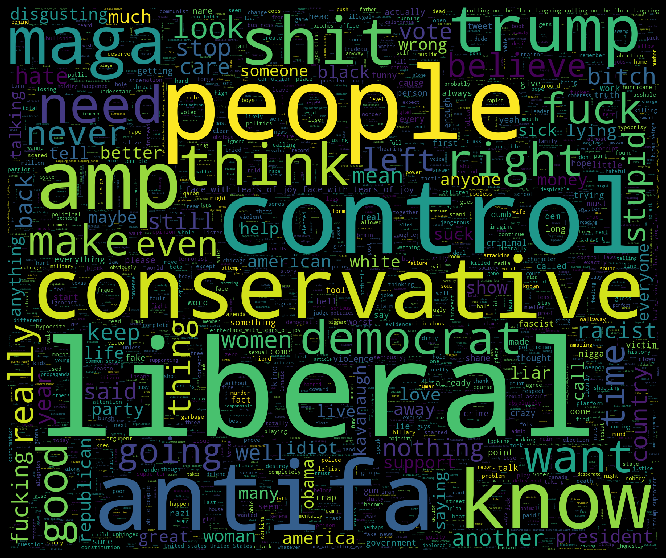

In [67]:
Plot_Wordcloud(df_subtask_b,'tidy_tweet','subtask_b','TIN')

# Retrieve Tweets for Subtask C

In [71]:
df_subtask_c=pd.DataFrame()
df_subtask_c = df_subtask_b.ix[(df_subtask_b['subtask_b'] == 'TIN'),['tweet','tidy_tweet','subtask_a','subtask_b','subtask_c']]
df_subtask_c = df_subtask_c.reset_index()
del df_subtask_c['index']

df_subtask_c

C:\Users\Mhaiskao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,tweet,tidy_tweet,subtask_a,subtask_b,subtask_c
0,'home drunk #maga #trump2020 oncoming_fist Uni...,home drunk #maga #trump2020 oncoming_fist Unit...,OFF,TIN,IND
1,'liberals kookoo',liberals kookoo,OFF,TIN,OTH
2,'literally just talking about this mass shooti...,literally talking mass shootings propaganda us...,OFF,TIN,GRP
3,'canada doesn need another cuck already have e...,canada need another cuck already enough #loone...,OFF,TIN,IND
4,'lying corrupt traitor nobody wants hear anymo...,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND
5,'control that these kids asking',control kids asking,OFF,TIN,OTH
6,'throwing bullshit flag such nonsense #putupor...,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND
7,'kind like when conservatives wanna associate ...,kind conservatives wanna associate everyone le...,OFF,TIN,GRP
8,'fuck going people there's men's room women's ...,fuck going people men's room women's room pick...,OFF,TIN,GRP
9,'these days just don't like people general jus...,days people general connect people days annoyance,OFF,TIN,IND


# Stemming and Lemmatization for Subtask C

In [72]:
df_stemming_c=pd.DataFrame()
df_stemming_c['tidy_tweet']=df_subtask_c['tidy_tweet']

df_stemming_c=StemmingAndLemma(df_stemming_c,df_subtask_c)
df_stemming_c

,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,"[home, drunk, #maga, #trump2020, oncoming_fist...",home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
1,liberals kookoo,liber kookoo,liberals kookoo,"[liberals, kookoo]",liberals kookoo,liberals kookoo,liberals kookoo
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada need another cuck already enough #loone...,canada need anoth cuck alreadi enough # looney...,canada need another cuck already enough #loone...,"[canada, need, another, cuck, already, enough,...",canada need another cuck already enough #loone...,canada need another cuck already enough #loone...,canada need another cuck already enough #loone...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor li...,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids ask,"[control, kids, asking]",control kids ask,control kids asking,control kids asking
6,throwing bullshit flag nonsense #putuporshutup...,throw bullshit flag nonsens # putuporshutup # ...,throwing bullshit flag nonsense #putuporshutup...,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...,throwing bullshit flag nonsense #putuporshutup...
7,kind conservatives wanna associate everyone le...,kind conserv wan na associ everyon left commun...,kind conservatives wanna associate everyone le...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...,kind conservatives wanna associate everyone le...
8,fuck going people men's room women's room pick...,fuck go peopl men 's room women 's room pick s...,fuck going people men's room women's room pick...,"[fuck, going, people, men's, room, women's, ro...",fuck going people men's room women's room pick...,fuck going people men's room women's room pick...,fuck going people men's room women's room pick...
9,days people general connect people days annoyance,day peopl gener connect peopl day annoy,days people general connect people days annoy,"[days, people, general, connect, people, days,...",days people general connect people days annoy,days people general connect people days annoyance,days people general connect people days annoyance


# Remove words with frequency less than 3

In [73]:
df_stemming_c=frequency(df_stemming_c)
df_stemming_c

ddfddddf tidy_tweet
ddfddddf word_tokenize
ddfddddf SnowballStemmer123
ddfddddf Porter
ddfddddf Lancaster
ddfddddf Lemmatized


,tidy_tweet,word_tokenize,SnowballStemmer123,tokenized,Porter,Lancaster,Lemmatized
0,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,"[home, drunk, #maga, #trump2020, oncoming_fist...",home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
1,liberals,liber,liberals,"[liberals, kookoo]",liberals,liberals,liberals
2,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,"[literally, talking, mass, shootings, propagan...",literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,"[canada, need, another, cuck, already, enough,...",canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
4,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,"[lying, corrupt, traitor, nobody, wants, hear,...",lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,control kids asking,control kid ask,control kids,"[control, kids, asking]",control kids,control kids asking,control kids asking
6,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,"[throwing, bullshit, flag, nonsense, #putupors...",throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga
7,kind conservatives wanna everyone left communi...,kind conserv wan na associ everyon left commun...,kind conservatives wanna everyone left communi...,"[kind, conservatives, wanna, associate, everyo...",kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...
8,fuck going people room women's room pick stick...,fuck go peopl men 's room women 's room pick s...,fuck going people room women's room pick stick...,"[fuck, going, people, men's, room, women's, ro...",fuck going people room women's room pick stick...,fuck going people room women's room pick stick...,fuck going people room women's room pick stick...
9,days people general people days,day peopl gener connect peopl day annoy,days people general people days,"[days, people, general, connect, people, days,...",days people general people days,days people general people days,days people general people days


# Final Updated Tweet's for Subtask_C

In [74]:
df_subtask_c['tidy_tweet_updated']=df_stemming_c['tidy_tweet']
df_subtask_c['word_tokenize']=df_stemming_c['word_tokenize']
df_subtask_c['SnowballStemmer123']=df_stemming_c['SnowballStemmer123']
df_subtask_c['Porter']=df_stemming_c['Porter']
df_subtask_c['Lancaster']=df_stemming_c['Lancaster']
df_subtask_c['Lemmatized']=df_stemming_c['Lemmatized']
df_subtask_c

,tweet,tidy_tweet,subtask_a,subtask_b,subtask_c,tidy_tweet_updated,word_tokenize,SnowballStemmer123,Porter,Lancaster,Lemmatized
0,'home drunk #maga #trump2020 oncoming_fist Uni...,home drunk #maga #trump2020 oncoming_fist Unit...,OFF,TIN,IND,home drunk #maga #trump2020 oncoming_fist Unit...,home drunk # maga # trump2020 oncoming_fist un...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist unit...,home drunk #maga #trump2020 oncoming_fist Unit...
1,'liberals kookoo',liberals kookoo,OFF,TIN,OTH,liberals,liber,liberals,liberals,liberals,liberals
2,'literally just talking about this mass shooti...,literally talking mass shootings propaganda us...,OFF,TIN,GRP,literally talking mass shootings propaganda us...,liter talk mass shoot propaganda use divid maj...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...,literally talking mass shootings propaganda us...
3,'canada doesn need another cuck already have e...,canada need another cuck already enough #loone...,OFF,TIN,IND,canada need another already enough #liberals g...,canada need anoth alreadi enough # # liber gre...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...,canada need another already enough #liberals g...
4,'lying corrupt traitor nobody wants hear anymo...,lying corrupt traitor nobody wants hear anymor...,OFF,TIN,IND,lying corrupt traitor nobody wants hear anymor...,lie corrupt traitor nobodi want hear anymor lie #,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...,lying corrupt traitor nobody wants hear anymor...
5,'control that these kids asking',control kids asking,OFF,TIN,OTH,control kids asking,control kid ask,control kids,control kids,control kids asking,control kids asking
6,'throwing bullshit flag such nonsense #putupor...,throwing bullshit flag nonsense #putuporshutup...,OFF,TIN,IND,throwing bullshit flag nonsense #kavanaugh #maga,throw bullshit flag nonsens # # kavanaugh # ma...,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga,throwing bullshit flag nonsense #kavanaugh #maga
7,'kind like when conservatives wanna associate ...,kind conservatives wanna associate everyone le...,OFF,TIN,GRP,kind conservatives wanna everyone left communi...,kind conserv wan na associ everyon left commun...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...,kind conservatives wanna everyone left communi...
8,'fuck going people there's men's room women's ...,fuck going people men's room women's room pick...,OFF,TIN,GRP,fuck going people room women's room pick stick...,fuck go peopl men 's room women 's room pick s...,fuck going people room women's room pick stick...,fuck going people room women's room pick stick...,fuck going people room women's room pick stick...,fuck going people room women's room pick stick...
9,'these days just don't like people general jus...,days people general connect people days annoyance,OFF,TIN,IND,days people general people days,day peopl gener connect peopl day annoy,days people general people days,days people general people days,days people general people days,days people general people days


In [28]:
final_df.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\Training_file.csv", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')

NameError: name 'final_df' is not defined

In [ ]:
#Final Dataframe with single quoted tweet without stop words and with correct labels
df_without_words=pd.DataFrame()
df_without_words['tidy_tweet']=df['tidy_tweet']

for i in range(len(df_without_words)):
    querywords = df_without_words['tidy_tweet'][i].split()
    resultwords  = [word for word in querywords if word.lower() not in stop_words]
    df_without_words['tidy_tweet'][i] = ' '.join(resultwords)
    
df_without_words['subtask_a']=df['subtask_a']
df_without_words['subtask_b']=df['subtask_b']
df_without_words['subtask_c']=df['subtask_c']
drop_index=[]
for i in range(0,13239):
    if df_without_words['tidy_tweet'][i]=='':
        drop_index.append(i)
print(drop_index)
df_without_words.drop(df_without_words.index[drop_index],inplace=True)
df_without_words.update("'" + df_without_words[['tidy_tweet']].astype(str) + "'")
print(df_without_words)
df_without_words.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\NoStopWords(Ver1 A csv).csv", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')
df_without_words.to_csv(r"C:\Users\Mhaiskao\Desktop\Assignments\DMTA\NoStopWords(Ver1 A arff).arff", header=False,index=False,mode='a',quotechar="'",quoting=3,escapechar='"')